MainProcess


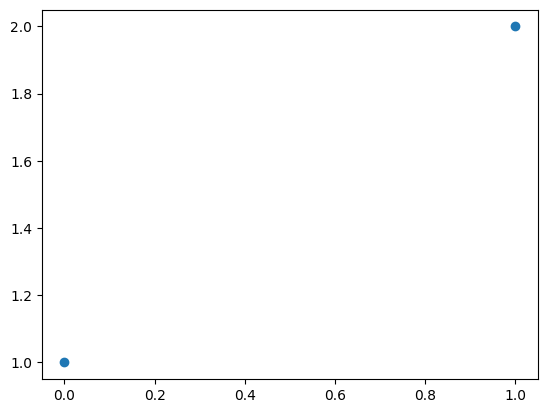

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])
fastMode = False

In [2]:
#Prepare datasets
fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 151
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 1000000
model.step1Labels.cos_lr = False
model.step1Labels.lrf = 1.0
model.step1Labels.patience = 0
model.step1Labels.dropout = 0.0
model.step1Labels.use_pretrained_weights = False
train_data = loaded_data.train_data
test_data = loaded_data.test_data
epoch_list = [25,50,75,100,125,150]
if fastMode:
    model.step1Labels.n_epochs = 15
    model.step1Labels.trust = 0
    train_data = train_data[::10]
    test_data = test_data[::10]
    epoch_list = [5,10]
#model.step1Labels.mixup = 0.0

In [ ]:
for sed in range(1000):
    seed = sed+3000
    model2 = copy.deepcopy(model)
    model2.seed = seed
    model2.train(train_data, test_data)
    fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
    import shutil
    shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
    import ultralytics
    data_list = []
    for epoch in epoch_list:
        model2.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
        model2.step1Labels.concentration = 2
        model2.run_in_parallel=True
        data_list.append(model2.infer(test_data))
        fls.dill_save(fls.temp_dir + '/intermediate_weights/' + str(epoch) + '.pickle', data_list)
    fls.dill_save(fls.temp_dir + 'intermediate_data' + str(seed) + '.pickle', data_list)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: d:/flagellar/temp//yolo_dataset/
- YAML configuration: d:/flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at d:/flagellar/temp/training.yaml
Using YAML file: d:/flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: d:/flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.131 available  Update with 'pip install -U ultralytics'
WARNING  'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.yaml, data=d:/flagellar/temp/training.yaml, epochs=151, time=None, patience=0, batch=12, imgsz=640, save=True, save_period=5, c

train: Scanning D:\flagellar\temp\yolo_dataset\labels\train... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████

train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds 

val: Fast image access  (ping: 0.10.0 ms, read: 16.62.0 MB/s, size: 91.0 KB)


val: Scanning D:\flagellar\temp\yolo_dataset\labels\val... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/

val: New cache created: D:\flagellar\temp\yolo_dataset\labels\val.cache


Plotting labels to d:\flagellar\temp\yolo_weights\motor_detector\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to d:\flagellar\temp\yolo_weights\motor_detector
Starting training for 151 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.188     0.0678     0.0488     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.176      0.415      0.153     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.544      0.588      0.512      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.48      0.575      0.546      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.671      0.705      0.666      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.614      0.659      0.643      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.692      0.667      0.734      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.84      0.666      0.768       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.862       0.78      0.831      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.752      0.726      0.802      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.879      0.661      0.816      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.847      0.759      0.846      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.918      0.734       0.86      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.852      0.791      0.853      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.896      0.813      0.858       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.812       0.76      0.819      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.866      0.734      0.825      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.909      0.815      0.911      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.895      0.833      0.915      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.939      0.886      0.948      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.899       0.84      0.919      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.943      0.894      0.944      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.904      0.835      0.915      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.915      0.846      0.922      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.876      0.859      0.916      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.893      0.789      0.877      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.92      0.846      0.898      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.963      0.929      0.965      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.913      0.827      0.913      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.927      0.899      0.951      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.883      0.879      0.925      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.925       0.87      0.942      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.959      0.895      0.955      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.921      0.882      0.938      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.933      0.916      0.962      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.965      0.832      0.935      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.926      0.911      0.942      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.939      0.924      0.964      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.964      0.938      0.961      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.952      0.911      0.956      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.938      0.886      0.954      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.954      0.899      0.962       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.973      0.869      0.951      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.955      0.923      0.969      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.972      0.916      0.966      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.959      0.938      0.983      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.944      0.927      0.974       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.919      0.923      0.952      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.967      0.905       0.97      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.95      0.905      0.959      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.976      0.882      0.967      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.934      0.923      0.964       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.952       0.94      0.967      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.974      0.905      0.959       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.982      0.924      0.969      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.946       0.93      0.968      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.964      0.892      0.961      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:33

                   all        393        369      0.967      0.887      0.944      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20

                   all        393        369      0.968      0.904      0.953      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19

                   all        393        369      0.972      0.916       0.96      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20

                   all        393        369      0.962      0.948      0.966      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:26

                   all        393        369      0.947      0.902       0.95      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.964       0.94       0.97      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/151       5.7G      1.174     0.7416     0.8671         13        640:  10%|▉         | 24/249 [00:04<00:36,  6

In [ ]:
plt.figure()
plt.grid(True)
all_scores = []
files = glob.glob(fls.temp_dir + 'intermediate_data*.pickle')
for f in files:
    data_list = fls.dill_load(f)
    import flg_diagnostics
    import importlib
    importlib.reload(flg_diagnostics)
    scores = []
    for d in data_list:
        a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
        scores.append(fls.score_competition_metric(a,b)[2])
    plt.plot(epoch_list,scores)
    all_scores.append(scores)
all_scores=np.array(all_scores)
plt.errorbar(epoch_list, np.mean(all_scores,axis=0), yerr = np.std(all_scores,axis=0)/np.sqrt(all_scores.shape[0]), linewidth=4, color='black')

In [ ]:
import scipy.stats
scipy.stats.ttest_1samp(all_scores[:,3]-all_scores[:,2],0)